In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import pylab as plt

In [3]:
## Gradient Descent Algorithm Check

In [ ]:
while conv_step > precision and niter < max_iter:\n"

In [ ]:
    while conv_step > precision and niter < max_iter:\n",
    "        previous = current\n",
    "        current = current - learning_rate * df(previous)\n",
    "        print (previous, current)\n",
    "        conv_step = np.abs(current - previous)\n",
    "        #currents[niter] = current\n",
    "        niter += 1\n",
    "        \n",
    "    currents = currents[np.nonzero(currents)]\n",

In [54]:
def GD_regression(x,y,a0=0,b0=0, maxiter=1000, learning_rate=0.01, precision=0.00001):
    """
    Fit a straight line ax+b using Gradient Descent
    """
    N = len(y)
    costs = np.zeros(maxiter)
    error = 1
    niter = 0
    while error > precision and niter<maxiter:
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y.copy()
        
        y_previous = y_now
        y_now = (a_now * x) + b_now
        error = np.abs(sum(y_now - y_previous))
        costs[niter] = sum([c**2 for c in (y-y_now)]) / N
        grad_a = -(2/N) * sum(x*(y-y_now))
        grad_b = -(2/N) * sum(y-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        niter += 1
        y_previous = y_now
        
    return a_now, b_now, costs, niter

60.1325818248
1.57325652509
1.53353042973
1.49480581602
1.45705743889
1.42026068962
1.38439157982
1.34942672579
1.31534333328
1.28211918263
1.24973261428
1.21816251468
1.18738830246
1.1573899151
1.12814779578
1.09964288068
1.07185658653
1.04477079848
1.01836785835
0.992630553045
0.967542103397
0.943086153189
0.91924675851
0.896008377355
0.873355859498
0.851274436614
0.829749712654
0.808767654458
0.788314582609
0.768377162517
0.748942395725
0.729997611437
0.711530458257
0.69352889614
0.67598118854
0.658875894766
0.642201862515
0.62594822061
0.610104371912
0.594659986408
0.579604994481
0.564929580349
0.550624175657
0.536679453251
0.523086321089
0.509835916321
0.496919599506
0.484328948984
0.472055755387
0.460092016283
0.448429930964
0.43706189536
0.425980497081
0.415178510586
0.404648892474
0.39438477689
0.384379471052
0.374626450888
0.365119356782
0.355851989427
0.34681830579
0.338012415166
0.329428575341
0.321061188849
0.312904799324
0.304954087942
0.297203869953
0.289649091303
0.28228

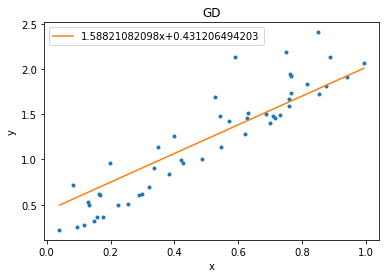

In [55]:
slope, intersect, costs, niter = GD_regression(samp_x, samp_y)
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD')
plt.legend()

In [135]:
def SGD_regression(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.01, precision=1e-4):
    """
    Fit a straight line ax+b with SGD (smaller subsets of data for each iteration)
    """
    N = len(y)
    costs = np.zeros(maxiter)
    niter = 0
    error = 1
    
    while error > precision and niter<maxiter:
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]

        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
            
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        error = np.abs(sum(y_now - y_previous))
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        niter += 1
        
    return a_now, b_now, costs, niter

In [76]:
samp_x = np.sort(np.random.rand(50))
samp_N = np.random.rand(50) * np.random.rand(50)
samp_y = samp_x * 2 + samp_N

In [216]:
%timeit slope, intersect, costs, niter = SGD_regression(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  if sys.path[0] == '':


835 ms ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10000


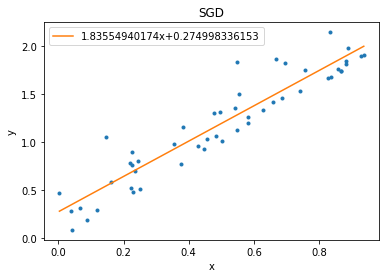

In [137]:
print (niter)
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))

plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD')
plt.legend()

In [141]:
def SGD_momentum_regression(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.001, vrate=0.25, precision=1e-4):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    vrate: velocity weight
    """
    N = len(y)
    costs = np.zeros(maxiter)
    vel_a = np.zeros(maxiter)
    vel_b = np.zeros(maxiter)
    niter = 0
    error = 1
    
    while error > precision and niter < maxiter:
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
            
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        error = np.abs(sum(y_now - y_previous))
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)
        a_past = a_now ## just to perserve
        b_past = b_now
        
        a_now = a_now - (learning_rate * grad_a + vrate * vel_a[niter])
        b_now = b_now - (learning_rate * grad_b + vrate * vel_b[niter])
        
        vel_a[niter] = a_now - a_past
        vel_b[niter] = b_now - b_past
        niter += 1
    
    velocities = np.vstack((vel_a, vel_b))
        
    return a_now, b_now, costs, velocities, niter

In [215]:
%timeit slope, intersect, costs, velocities, niter = SGD_momentum_regression(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  from ipykernel import kernelapp as app


The slowest run took 6.40 times longer than the fastest. This could mean that an intermediate result is being cached.
496 ms ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


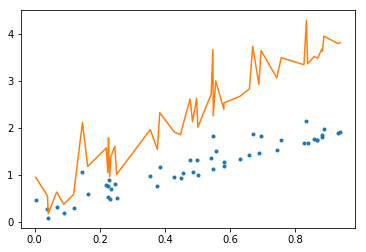

In [94]:
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, 2*samp_y, '-')

9686


Text(0.5,1,'SGD Momentum')

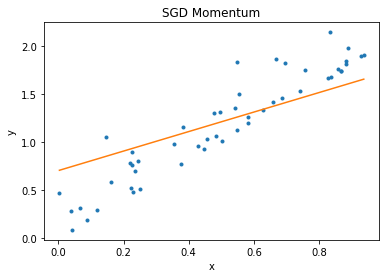

In [144]:
print (niter)
plt.plot(samp_x, samp_y, '.')
#plt.plot(samp_x,slope*samp_x+intersect)
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Momentum')

In [148]:
def AdaGrad(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.01, precision=1e-4):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    vrate: velocity weight
    """
    N = len(y)
    costs = np.zeros(maxiter)
    niter = 0
    error = 1
    
    while error > precision and niter < maxiter:
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
            
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        error = np.abs(sum(y_now - y_previous))
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)
        
        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(grad_a**2)+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(grad_b**2)+eps)
        niter += 1
        
    return a_now, b_now, costs, niter

In [214]:
%timeit slope, intersect, costs, niter = AdaGrad(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  del sys.path[0]


The slowest run took 13.07 times longer than the fastest. This could mean that an intermediate result is being cached.
704 ms ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10000


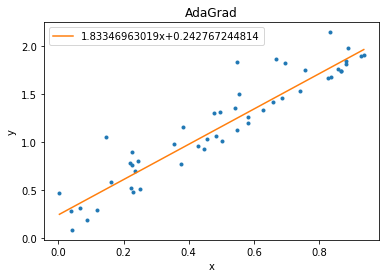

In [150]:
print (niter)
plt.plot(samp_x, samp_y, '.')
#plt.plot(samp_x,slope*samp_x+intersect)
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaGrad')
plt.legend()

In [ ]:
y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        error = np.abs(sum(y_now - y_previous))

In [165]:
def RMSprop(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.01, gamma=0.85, precision=1e-4):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    gamma: weights of how much previous gradient is considered
    """
    N = len(y)
    costs = np.zeros(maxiter)
    a_decay = np.zeros(maxiter+1)
    b_decay = np.zeros(maxiter+1)
    niter = 0
    error = 1
    
    while error > precision and niter < maxiter:            
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
        
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        error = np.abs(sum(y_now - y_previous))
        
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)

        eps = 0.1 * np.std(y_now) ## small noise term to fiddle around
        
        if niter == 0:
            a_decay[niter], b_decay[niter] = grad_a**2, grad_b**2
          
        a_decay[niter+1] =  gamma * a_decay[niter] + (1-gamma) * (grad_a**2)
        b_decay[niter+1] = gamma * b_decay[niter] + (1-gamma) * (grad_b**2) 
        
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(a_decay[niter+1])+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(b_decay[niter+1])+eps)

        niter += 1
        
    return a_now, b_now, costs, niter

In [217]:
%timeit slope, intersect, costs, niter = RMSprop(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  from ipykernel import kernelapp as app


The slowest run took 158.67 times longer than the fastest. This could mean that an intermediate result is being cached.
962 ms ± 415 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


5083


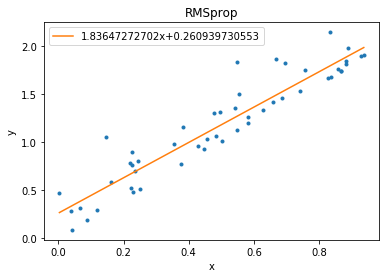

In [168]:
print(niter)
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('RMSprop')
plt.legend()

In [192]:
def AdaDelta(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.01, gamma=0.85, precision=1e-4):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    gamma: weights of how much previous gradient is considered
    """
    N = len(y)
    costs = np.zeros(maxiter)
    a_decay = np.zeros(maxiter+1)
    b_decay = np.zeros(maxiter+1)
    niter = 0
    error = 1
    
    while error > precision and niter < maxiter:   
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
        
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)
        error = np.abs(sum(y_now - y_previous))

        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        
        if niter == 0:
            a_decay[niter], b_decay[niter] = grad_a**2, grad_b**2
        
        a_now = a_now - (learning_rate * grad_a) / (np.sqrt(a_decay[niter]**2)+eps)
        b_now = b_now - (learning_rate * grad_b) / (np.sqrt(b_decay[niter]**2)+eps)

        a_decay[niter+1] =  gamma * a_decay[niter] + (1-gamma) * (grad_a**2)
        b_decay[niter+1] = gamma * b_decay[niter] + (1-gamma) * (grad_b**2) 
        niter +=1
        
    return a_now, b_now, costs, niter

In [218]:
%timeit slope, intersect, costs, niter = AdaDelta(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  from ipykernel import kernelapp as app


831 ms ± 167 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10000


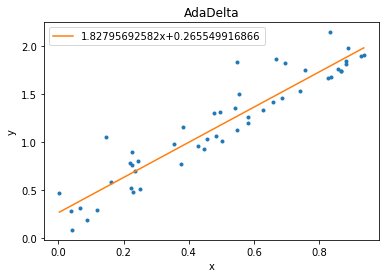

In [194]:
print (niter)
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaDelta')
plt.legend()

In [211]:
def ADAM(x,y,a0=0,b0=0, subset_size=20, maxiter=10000, learning_rate=0.01, gamma1=0.45, gamma2=0.65, precision=1e-4):
    """
    Fit a straight line ax+b with SGD Moment(smaller subsets of data for each iteration)
    gamma: weights of how much previous gradient is considered
    """
    N = len(y)
    costs = np.zeros(maxiter)
    a_decay1 = np.zeros(maxiter+1)
    b_decay1 = np.zeros(maxiter+1)
    a_decay2 = np.zeros(maxiter+1)
    b_decay2 = np.zeros(maxiter+1)
    niter = 0
    error = 1
    
    while error > precision and niter < maxiter:  
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        if niter == 0:
            a_now, b_now = a0, b0
            y_now = y_subset.copy()
            
        y_previous = y_now
        y_now = (a_now * x_subset) + b_now
        costs[niter] = sum([c**2 for c in (y_subset-y_now)]) / N
        error = np.abs(sum(y_now - y_previous))
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)

        eps = 0.1 * np.std(x) ## small noise term to fiddle around
        
        if niter == 0:
            a_decay1[niter], b_decay1[niter] = grad_a**2, grad_b**2
            a_decay2[niter], b_decay2[niter] = grad_a, grad_b
        
        a_now = a_now - (learning_rate * a_decay1[niter]) / (np.sqrt(a_decay2[niter]**2)+eps)
        b_now = b_now - (learning_rate * b_decay1[niter]) / (np.sqrt(b_decay2[niter]**2)+eps)

        a_decay1[niter+1] =  gamma1 * a_decay1[niter] + (1-gamma1) * (grad_a)
        b_decay1[niter+1] = gamma1 * b_decay1[niter] + (1-gamma1) * (grad_b) 
        a_decay2[niter+1] =  gamma2 * a_decay2[niter] + (1-gamma2) * (grad_a**2)
        b_decay2[niter+1] = gamma2 * b_decay2[niter] + (1-gamma2) * (grad_b**2)
        
        niter += 1
        
    return a_now, b_now, costs, niter

In [219]:
%timeit slope, intersect, costs, niter = ADAM(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead


768 ms ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10000


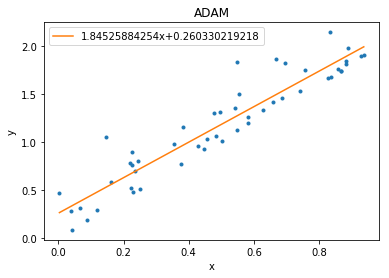

In [213]:
print (niter)
plt.plot(samp_x, samp_y, '.')
plt.plot(samp_x, slope*samp_x+intersect, label=str(slope)+'x+'+str(intersect))
plt.xlabel('x')
plt.ylabel('y')
plt.title('ADAM')
plt.legend()